<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import time
time.sleep(3*60*60)

In [3]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\melnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [4]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [5]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [6]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [8]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False


def patchify(data, n_patches):
    n, c, h, w = data.shape
    # Create tensor on the same device as input data
    patches = torch.zeros(n, n_patches**2, (c*h*w) // (n_patches**2), device=data.device)
    patch_size = h // n_patches
    for idx, d in enumerate(data):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = d[:, i*patch_size: (i+1)*patch_size, j*patch_size: (j+1) * patch_size]
                patches[idx, i*n_patches + j] = patch.flatten()
    return patches

def get_positional_embeddings(sequence_length, d, device='cpu'):
    result = torch.ones(sequence_length, d, device=device)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = np.sin(i / (10000 ** (j / d))) if j % 2 == 0 else np.cos(i / (10000 ** ((j - 1) / d)))
    return result

class vit(nn.Module):
    def __init__(self, input_size, n_patches, hidden_size, num_classes,num_transformer_blocks=2,num_heads=4):
        
        super().__init__()
        self.chw = input_size
        self.n_patches = n_patches
        self.patch_size = ((self.chw[1] // n_patches) ** 2) * self.chw[0]
        self.linear_mapper = nn.Linear(self.patch_size, hidden_size)
        self.class_token = nn.Parameter(torch.rand(1, hidden_size))
        self.pos_embed = nn.Parameter(torch.tensor(
                                            get_positional_embeddings(self.n_patches ** 2 + 1, hidden_size), 
                                            device=self.class_token.device
                                        ))
        self.pos_embed.requires_grad = True
        self.layer_norm = nn.LayerNorm(hidden_size)

        # Transformer encoder layers
        self.encoder_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, batch_first=True)
            for _ in range(num_transformer_blocks)
        ])
        self.classifier = nn.Sequential(nn.Linear(hidden_size, num_classes))

        # For saliency maps
        self.gradients = None
        self.activations = None
        self._register_hook = False

    def save_gradient(self, grad):
        self.gradients = grad

    def forward(self, x):
        patches = patchify(x, self.n_patches)
        
        x = self.linear_mapper(patches)
        x = torch.stack([torch.vstack((self.class_token, x[i])) for i in range(len(x))])
        pos_embed = self.pos_embed.repeat(len(x), 1, 1)
        x = x + pos_embed
        x = self.layer_norm(x)

        # Pass through transformer encoder layers
        for idx, layer in enumerate(self.encoder_layers):
            x = layer(x)
            if idx == len(self.encoder_layers) - 1 and not self._register_hook:
                x.register_hook(self.save_gradient)  # Register hook only once
                self._register_hook = True
            self.activations = x  # Save the latest activations

        x = x[:, 0]  # Select CLS token for classification
        x = self.classifier(x)
        return x

    def get_activations_gradient(self):
        return self.gradients

    def get_activations(self):
        return self.activations

    def set_hook(self, hook_status):
        self._register_hook = hook_status

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [9]:

randomdata = torch.randn((1, 3, 224, 224))  # Adjusted to match the input shape (batch_size, channels, height, width)

# Modify the vit parameters to accommodate the shape mismatch
model = vit(input_size=(3, 224, 224), n_patches=14, hidden_size=256, num_classes=2)  # Adjusted n_patches and hidden_size
output = model(randomdata)
output.shape

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


torch.Size([1, 2])

In [10]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
vit                                                          50,688
├─Linear: 1-1                                                196,864
├─LayerNorm: 1-2                                             512
├─ModuleList: 1-3                                            --
│    └─TransformerEncoderLayer: 2-1                          --
│    │    └─MultiheadAttention: 3-1                          263,168
│    │    └─Linear: 3-2                                      526,336
│    │    └─Dropout: 3-3                                     --
│    │    └─Linear: 3-4                                      524,544
│    │    └─LayerNorm: 3-5                                   512
│    │    └─LayerNorm: 3-6                                   512
│    │    └─Dropout: 3-7                                     --
│    │    └─Dropout: 3-8                                     --
│    └─TransformerEncoderLayer: 2-2                          --
│    │  

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(



HYPERPARAMETER SET 1
Parameters: {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 4.791527211534685e-05, 'weight_decay': 2.723389186594195e-05, 'batch_size': 32, 'num_transformer_blocks': 6, 'num_heads': 8, 'accuracy': 0.434}

Fold No: 1
Epoch [1/100], Loss: 0.7023, Accuracy: 0.5134
Validation Loss: 0.6734, Validation Accuracy: 0.5037
Epoch [2/100], Loss: 0.6944, Accuracy: 0.5273
Validation Loss: 0.7108, Validation Accuracy: 0.5595
Epoch [3/100], Loss: 0.6883, Accuracy: 0.5546
Validation Loss: 0.6763, Validation Accuracy: 0.5463
Epoch [4/100], Loss: 0.6833, Accuracy: 0.5551
Validation Loss: 0.6699, Validation Accuracy: 0.5448
Epoch [5/100], Loss: 0.6830, Accuracy: 0.5736
Validation Loss: 0.6782, Validation Accuracy: 0.5410
Epoch [6/100], Loss: 0.6736, Accuracy: 0.6120
Validation Loss: 0.7464, Validation Accuracy: 0.5665
Epoch [7/100], Loss: 0.6701, Accuracy: 0.6171
Validation Loss: 0.6187, Validation Accuracy: 0.5493
Epoch [8/100], Loss: 0.6616, Accuracy: 0.6523
Validation Loss: 0.

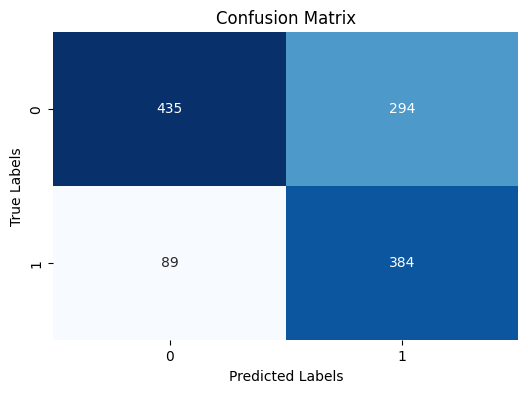


Class-wise Accuracy:
Class 0: 435/729 (59.67%)
Class 1: 384/473 (81.18%)

Precision-Recall Curve:


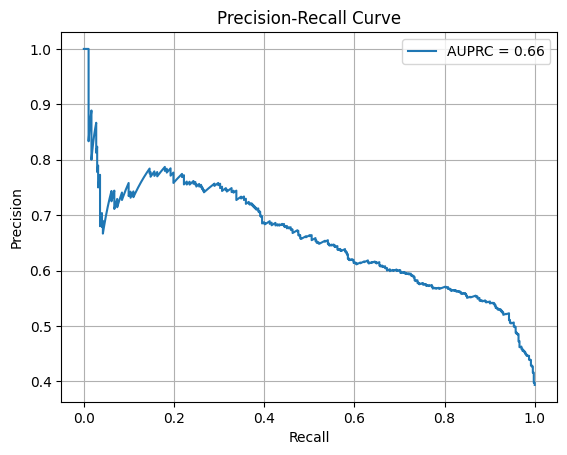


ROC Curve:


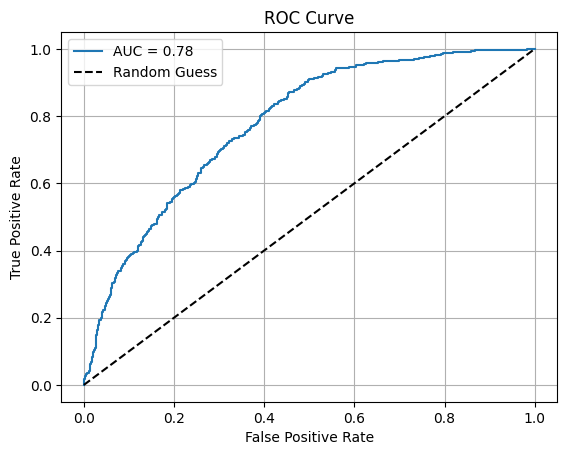


Mean F1 Score: 0.6808
Balanced Accuracy: 0.7043
Average AUPRC: 0.6586

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.69       729
           1       0.57      0.81      0.67       473

    accuracy                           0.68      1202
   macro avg       0.70      0.70      0.68      1202
weighted avg       0.73      0.68      0.68      1202


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7041, Accuracy: 0.5194
Validation Loss: 0.6798, Validation Accuracy: 0.4945
Epoch [2/100], Loss: 0.6967, Accuracy: 0.5261
Validation Loss: 0.7004, Validation Accuracy: 0.5192
Epoch [3/100], Loss: 0.6924, Accuracy: 0.5261
Validation Loss: 0.6842, Validation Accuracy: 0.6638
Epoch [4/100], Loss: 0.6995, Accuracy: 0.5103
Validation Loss: 0.6904, Validation Accuracy: 0.5901
Epoch [5/100], Loss: 0.6889, Accuracy: 0.5474
Validation Loss: 0.6890, Validation Accuracy: 0.5807
Epoch [6/100], Loss: 0.6927, Accuracy: 0.5346
Validation Loss: 0.6861, Validation Accuracy: 0.5854
Epoch [7/100], Loss: 0.6906, Accuracy: 0.5486
Validation Loss: 0.6671, Validation Accuracy: 0.7107
Epoch [8/100], Loss: 0.6821, Accuracy: 0.5644
Validation Loss: 0.6540, Validation Accuracy: 0.7113
Epoch [9/100], Loss: 0.6775, Accuracy: 0.5978
Validation Loss: 0.6674, Validation Accuracy: 0.6590
Epoch [10/100], Loss: 0.6761, Accuracy: 0.6009
Validation Loss: 0.6459, Validation Accuracy: 0.7186
Epoch [11

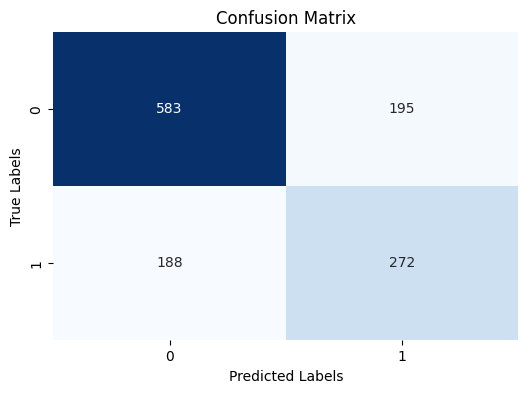


Class-wise Accuracy:
Class 0: 583/778 (74.94%)
Class 1: 272/460 (59.13%)

Precision-Recall Curve:


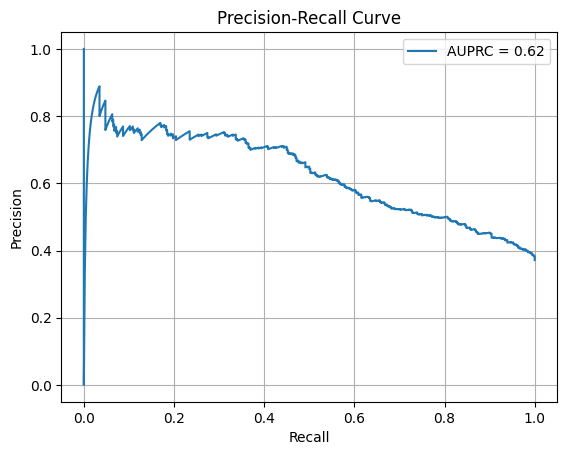


ROC Curve:


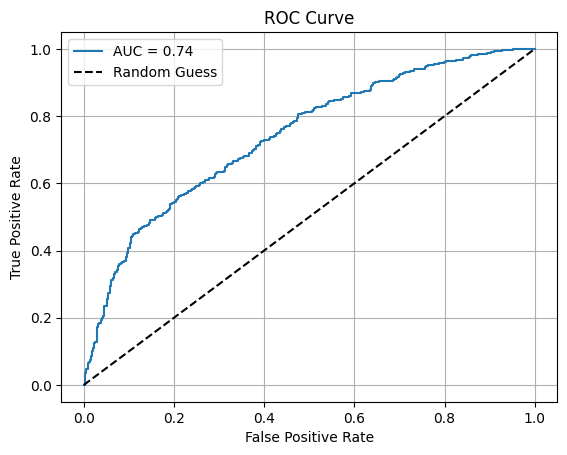


Mean F1 Score: 0.6698
Balanced Accuracy: 0.6703
Average AUPRC: 0.6227

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       778
           1       0.58      0.59      0.59       460

    accuracy                           0.69      1238
   macro avg       0.67      0.67      0.67      1238
weighted avg       0.69      0.69      0.69      1238


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7005, Accuracy: 0.5202
Validation Loss: 0.6920, Validation Accuracy: 0.5906
Epoch [2/100], Loss: 0.6777, Accuracy: 0.6164
Validation Loss: 0.7145, Validation Accuracy: 0.5820
Epoch [3/100], Loss: 0.6641, Accuracy: 0.6469
Validation Loss: 0.6503, Validation Accuracy: 0.6737
Epoch [4/100], Loss: 0.6568, Accuracy: 0.6642
Validation Loss: 0.6393, Validation Accuracy: 0.6504
Epoch [5/100], Loss: 0.6576, Accuracy: 0.6529
Validation Loss: 0.6556, Validation Accuracy: 0.6859
Epoch [6/100], Loss: 0.6454, Accuracy: 0.6849
Validation Loss: 0.6378, Validation Accuracy: 0.6864
Epoch [7/100], Loss: 0.6434, Accuracy: 0.6869
Validation Loss: 0.6404, Validation Accuracy: 0.7015
Epoch [8/100], Loss: 0.6419, Accuracy: 0.6859
Validation Loss: 0.6677, Validation Accuracy: 0.6832
Epoch [9/100], Loss: 0.6367, Accuracy: 0.7046
Validation Loss: 0.6346, Validation Accuracy: 0.6562
Epoch [10/100], Loss: 0.6409, Accuracy: 0.7071
Validation Loss: 0.6380, Validation Accuracy: 0.6800
Epoch [11

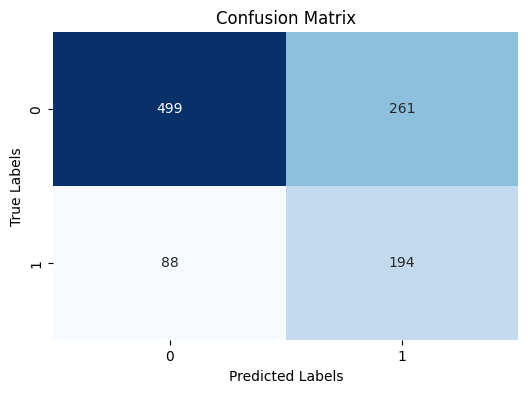


Class-wise Accuracy:
Class 0: 499/760 (65.66%)
Class 1: 194/282 (68.79%)

Precision-Recall Curve:


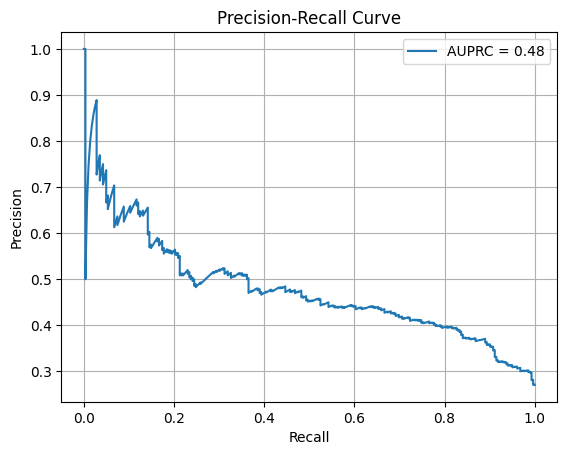


ROC Curve:


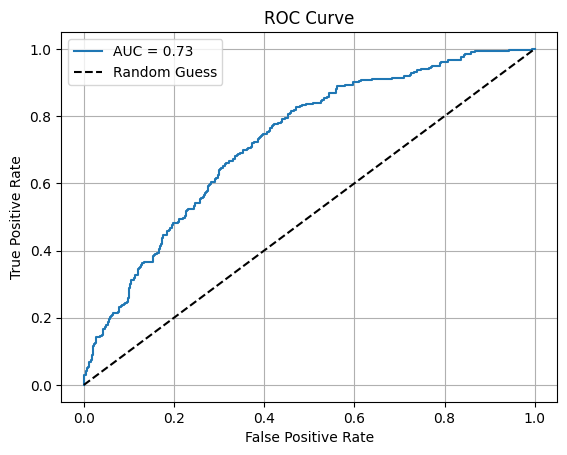


Mean F1 Score: 0.6337
Balanced Accuracy: 0.6723
Average AUPRC: 0.4780

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       760
           1       0.43      0.69      0.53       282

    accuracy                           0.67      1042
   macro avg       0.64      0.67      0.63      1042
weighted avg       0.74      0.67      0.68      1042


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7089, Accuracy: 0.5158
Validation Loss: 0.6949, Validation Accuracy: 0.5634
Epoch [2/100], Loss: 0.6945, Accuracy: 0.5321
Validation Loss: 0.6627, Validation Accuracy: 0.5167
Epoch [3/100], Loss: 0.6835, Accuracy: 0.5748
Validation Loss: 0.6709, Validation Accuracy: 0.4779
Epoch [4/100], Loss: 0.6650, Accuracy: 0.6435
Validation Loss: 0.7499, Validation Accuracy: 0.5742
Epoch [5/100], Loss: 0.6659, Accuracy: 0.6303
Validation Loss: 0.7079, Validation Accuracy: 0.5718
Epoch [6/100], Loss: 0.6561, Accuracy: 0.6593
Validation Loss: 0.6701, Validation Accuracy: 0.5658
Epoch [7/100], Loss: 0.6504, Accuracy: 0.6620
Validation Loss: 0.6953, Validation Accuracy: 0.5977
Epoch [8/100], Loss: 0.6374, Accuracy: 0.7082
Validation Loss: 0.6784, Validation Accuracy: 0.6532
Epoch [9/100], Loss: 0.6393, Accuracy: 0.6972
Validation Loss: 0.6490, Validation Accuracy: 0.6302
Epoch [10/100], Loss: 0.6249, Accuracy: 0.7135
Validation Loss: 0.6438, Validation Accuracy: 0.6453
Epoch [11

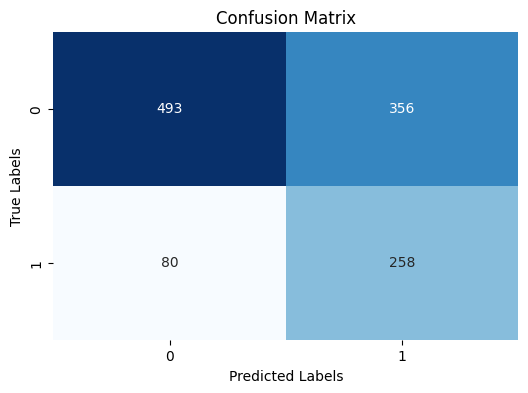


Class-wise Accuracy:
Class 0: 493/849 (58.07%)
Class 1: 258/338 (76.33%)

Precision-Recall Curve:


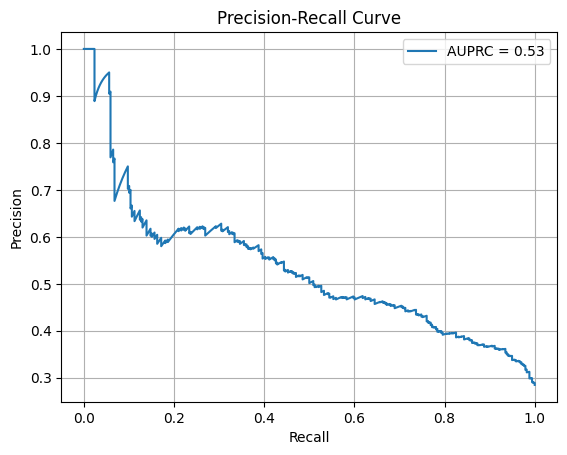


ROC Curve:


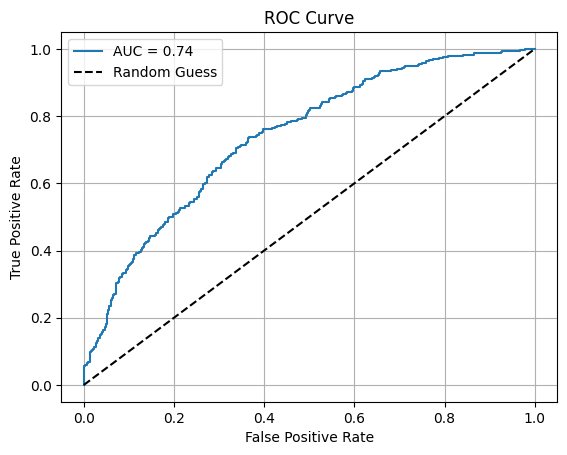


Mean F1 Score: 0.6177
Balanced Accuracy: 0.6720
Average AUPRC: 0.5308

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.58      0.69       849
           1       0.42      0.76      0.54       338

    accuracy                           0.63      1187
   macro avg       0.64      0.67      0.62      1187
weighted avg       0.74      0.63      0.65      1187


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7034, Accuracy: 0.5173
Validation Loss: 0.7031, Validation Accuracy: 0.5616
Epoch [2/100], Loss: 0.6824, Accuracy: 0.5724
Validation Loss: 0.6606, Validation Accuracy: 0.6206
Epoch [3/100], Loss: 0.6678, Accuracy: 0.6288
Validation Loss: 0.6464, Validation Accuracy: 0.5669
Epoch [4/100], Loss: 0.6543, Accuracy: 0.6621
Validation Loss: 0.6506, Validation Accuracy: 0.6358
Epoch [5/100], Loss: 0.6357, Accuracy: 0.7189
Validation Loss: 0.7083, Validation Accuracy: 0.6249
Epoch [6/100], Loss: 0.6330, Accuracy: 0.7206
Validation Loss: 0.6442, Validation Accuracy: 0.5895
Epoch [7/100], Loss: 0.6256, Accuracy: 0.7296
Validation Loss: 0.6361, Validation Accuracy: 0.6182
Epoch [8/100], Loss: 0.6177, Accuracy: 0.7383
Validation Loss: 0.6652, Validation Accuracy: 0.6488
Epoch [9/100], Loss: 0.6121, Accuracy: 0.7465
Validation Loss: 0.6930, Validation Accuracy: 0.6395
Epoch [10/100], Loss: 0.6057, Accuracy: 0.7560
Validation Loss: 0.6615, Validation Accuracy: 0.6167
Epoch [11

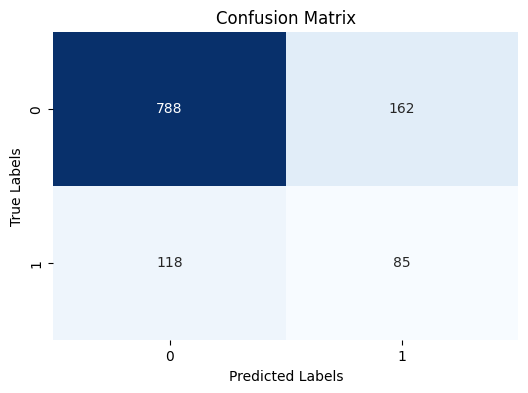


Class-wise Accuracy:
Class 0: 788/950 (82.95%)
Class 1: 85/203 (41.87%)

Precision-Recall Curve:


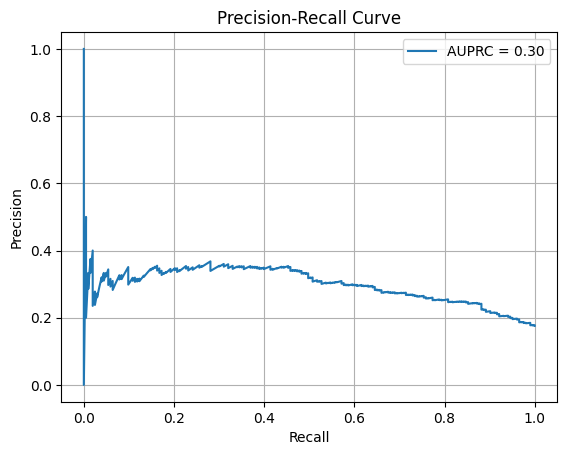


ROC Curve:


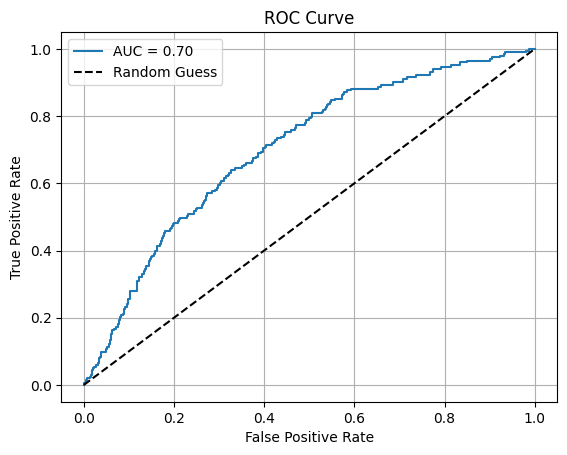


Mean F1 Score: 0.6135
Balanced Accuracy: 0.6241
Average AUPRC: 0.2971

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       950
           1       0.34      0.42      0.38       203

    accuracy                           0.76      1153
   macro avg       0.61      0.62      0.61      1153
weighted avg       0.78      0.76      0.77      1153


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 1:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.7043', '0.6703', '0.6723', '0.6720', '0.6241']
Average Balanced Accuracy across all folds: 0.6686
AUPRC for each fold: ['0.6586', '0.6227', '0.4780', '0.5308', '0.2971']
Average AUPRC across all folds: 0.5174
Best fold (Fold 1) class-wise accuracy:
  Class 0: Precision=0.8302, Recall=0.5967, F1=0.6943
  Class 1: Precision=0.5664, Recall=0.8118, F1=0.6672
  Macro Avg: Precision=0.69

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7086, Accuracy: 0.5102
Validation Loss: 0.7095, Validation Accuracy: 0.5557
Epoch [2/100], Loss: 0.6954, Accuracy: 0.5241
Validation Loss: 0.7118, Validation Accuracy: 0.5497
Epoch [3/100], Loss: 0.6855, Accuracy: 0.5685
Validation Loss: 0.6698, Validation Accuracy: 0.5499
Epoch [4/100], Loss: 0.6790, Accuracy: 0.6000
Validation Loss: 0.6986, Validation Accuracy: 0.6095
Epoch [5/100], Loss: 0.6606, Accuracy: 0.6602
Validation Loss: 0.7385, Validation Accuracy: 0.6138
Epoch [6/100], Loss: 0.6517, Accuracy: 0.6806
Validation Loss: 0.7123, Validation Accuracy: 0.6213
Epoch [7/100], Loss: 0.6496, Accuracy: 0.6838
Validation Loss: 0.6706, Validation Accuracy: 0.6457
Epoch [8/100], Loss: 0.6450, Accuracy: 0.6977
Validation Loss: 0.6711, Validation Accuracy: 0.6463
Epoch [9/100], Loss: 0.6371, Accuracy: 0.7046
Validation Loss: 0.6197, Validation Accuracy: 0.6462
Epoch [10/100], Loss: 0.6394, Accuracy: 0.7125
Validation Loss: 0.6492, Validation Accuracy: 0.6398
Epoch [11

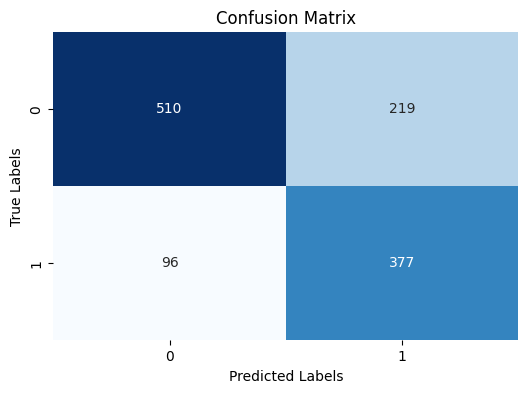


Class-wise Accuracy:
Class 0: 510/729 (69.96%)
Class 1: 377/473 (79.70%)

Precision-Recall Curve:


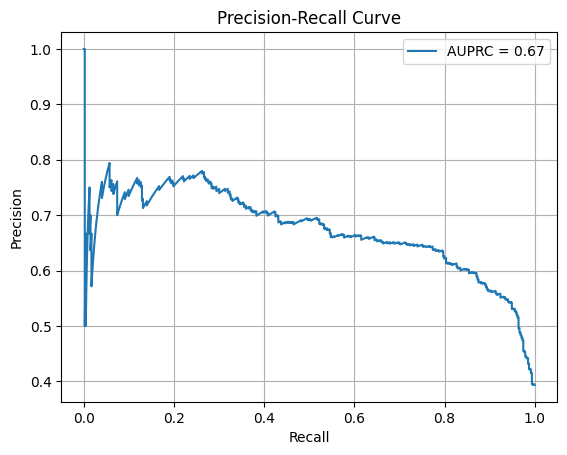


ROC Curve:


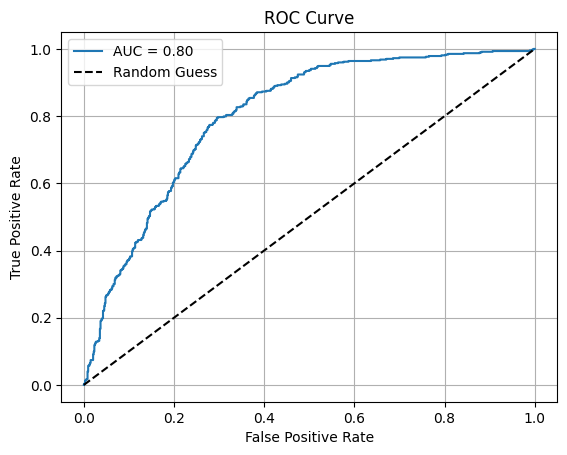


Mean F1 Score: 0.7347
Balanced Accuracy: 0.7483
Average AUPRC: 0.6724

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       729
           1       0.63      0.80      0.71       473

    accuracy                           0.74      1202
   macro avg       0.74      0.75      0.73      1202
weighted avg       0.76      0.74      0.74      1202


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7105, Accuracy: 0.4921
Validation Loss: 0.6974, Validation Accuracy: 0.5117
Epoch [2/100], Loss: 0.6975, Accuracy: 0.5036
Validation Loss: 0.6911, Validation Accuracy: 0.6271
Epoch [3/100], Loss: 0.6974, Accuracy: 0.4970
Validation Loss: 0.7142, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6978, Accuracy: 0.4915
Validation Loss: 0.6911, Validation Accuracy: 0.6431
Epoch [5/100], Loss: 0.6937, Accuracy: 0.5170
Validation Loss: 0.7119, Validation Accuracy: 0.5130
Epoch [6/100], Loss: 0.6943, Accuracy: 0.5255
Validation Loss: 0.6867, Validation Accuracy: 0.5206
Epoch [7/100], Loss: 0.6913, Accuracy: 0.5231
Validation Loss: 0.6802, Validation Accuracy: 0.6064
Epoch [8/100], Loss: 0.6919, Accuracy: 0.5079
Validation Loss: 0.6729, Validation Accuracy: 0.5000
Epoch [9/100], Loss: 0.6876, Accuracy: 0.5510
Validation Loss: 0.6942, Validation Accuracy: 0.5505
Epoch [10/100], Loss: 0.6870, Accuracy: 0.5462
Validation Loss: 0.6705, Validation Accuracy: 0.6604
Epoch [11

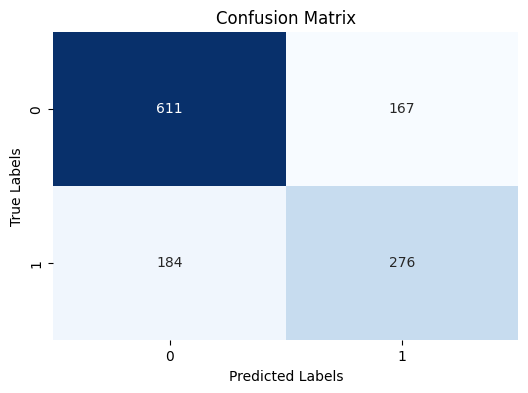


Class-wise Accuracy:
Class 0: 611/778 (78.53%)
Class 1: 276/460 (60.00%)

Precision-Recall Curve:


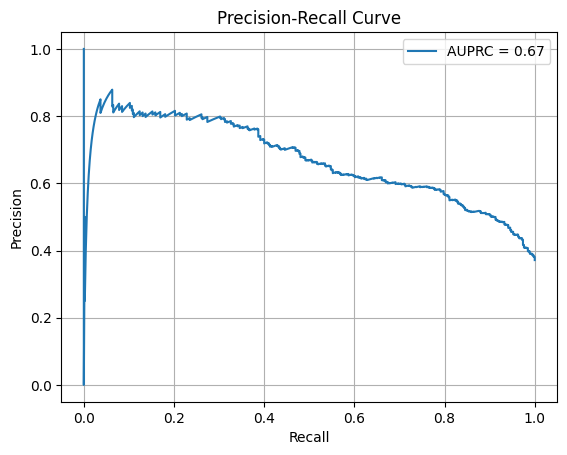


ROC Curve:


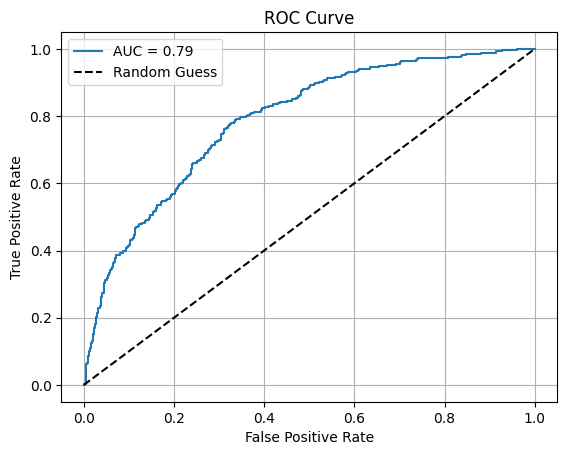


Mean F1 Score: 0.6941
Balanced Accuracy: 0.6927
Average AUPRC: 0.6671

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       778
           1       0.62      0.60      0.61       460

    accuracy                           0.72      1238
   macro avg       0.70      0.69      0.69      1238
weighted avg       0.71      0.72      0.72      1238


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7012, Accuracy: 0.5153
Validation Loss: 0.7035, Validation Accuracy: 0.5188
Epoch [2/100], Loss: 0.6948, Accuracy: 0.5375
Validation Loss: 0.7122, Validation Accuracy: 0.5293
Epoch [3/100], Loss: 0.6821, Accuracy: 0.5769
Validation Loss: 0.6686, Validation Accuracy: 0.6280
Epoch [4/100], Loss: 0.6566, Accuracy: 0.6588
Validation Loss: 0.6610, Validation Accuracy: 0.6728
Epoch [5/100], Loss: 0.6545, Accuracy: 0.6681
Validation Loss: 0.6603, Validation Accuracy: 0.6799
Epoch [6/100], Loss: 0.6446, Accuracy: 0.6953
Validation Loss: 0.6579, Validation Accuracy: 0.6769
Epoch [7/100], Loss: 0.6421, Accuracy: 0.7002
Validation Loss: 0.6482, Validation Accuracy: 0.6884
Epoch [8/100], Loss: 0.6345, Accuracy: 0.7027
Validation Loss: 0.6367, Validation Accuracy: 0.6451
Epoch [9/100], Loss: 0.6409, Accuracy: 0.7017
Validation Loss: 0.6762, Validation Accuracy: 0.6879
Epoch [10/100], Loss: 0.6351, Accuracy: 0.7115
Validation Loss: 0.6718, Validation Accuracy: 0.6699
Epoch [11

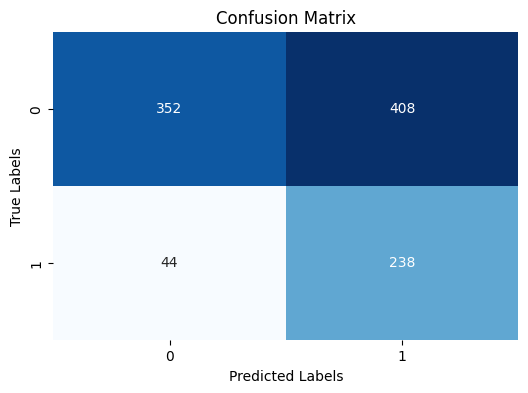


Class-wise Accuracy:
Class 0: 352/760 (46.32%)
Class 1: 238/282 (84.40%)

Precision-Recall Curve:


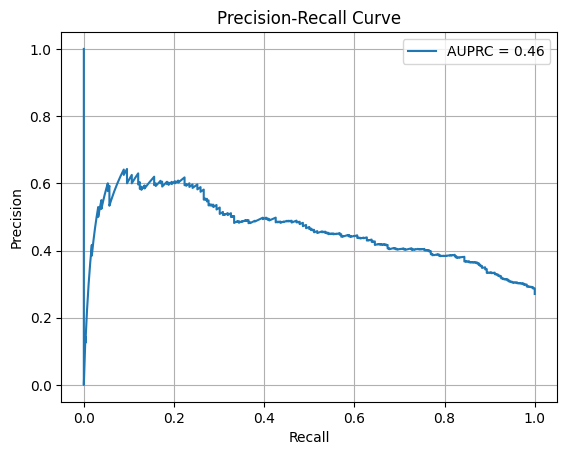


ROC Curve:


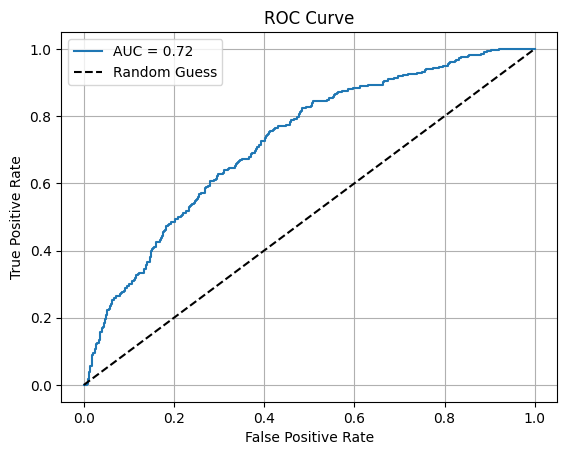


Mean F1 Score: 0.5610
Balanced Accuracy: 0.6536
Average AUPRC: 0.4615

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.46      0.61       760
           1       0.37      0.84      0.51       282

    accuracy                           0.57      1042
   macro avg       0.63      0.65      0.56      1042
weighted avg       0.75      0.57      0.58      1042


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7076, Accuracy: 0.5057
Validation Loss: 0.6824, Validation Accuracy: 0.5133
Epoch [2/100], Loss: 0.6933, Accuracy: 0.5335
Validation Loss: 0.6693, Validation Accuracy: 0.4673
Epoch [3/100], Loss: 0.6812, Accuracy: 0.5814
Validation Loss: 0.6949, Validation Accuracy: 0.5289
Epoch [4/100], Loss: 0.6734, Accuracy: 0.6109
Validation Loss: 0.7093, Validation Accuracy: 0.5696
Epoch [5/100], Loss: 0.6606, Accuracy: 0.6474
Validation Loss: 0.6586, Validation Accuracy: 0.5135
Epoch [6/100], Loss: 0.6497, Accuracy: 0.6677
Validation Loss: 0.6508, Validation Accuracy: 0.5414
Epoch [7/100], Loss: 0.6461, Accuracy: 0.6778
Validation Loss: 0.6670, Validation Accuracy: 0.5792
Epoch [8/100], Loss: 0.6414, Accuracy: 0.6954
Validation Loss: 0.7694, Validation Accuracy: 0.6050
Epoch [9/100], Loss: 0.6371, Accuracy: 0.6972
Validation Loss: 0.6481, Validation Accuracy: 0.6039
Epoch [10/100], Loss: 0.6286, Accuracy: 0.7236
Validation Loss: 0.6706, Validation Accuracy: 0.6508
Epoch [11

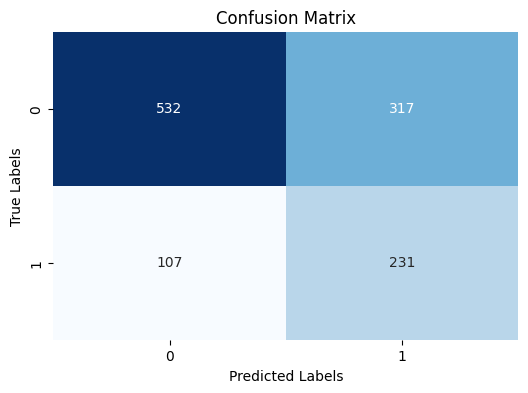


Class-wise Accuracy:
Class 0: 532/849 (62.66%)
Class 1: 231/338 (68.34%)

Precision-Recall Curve:


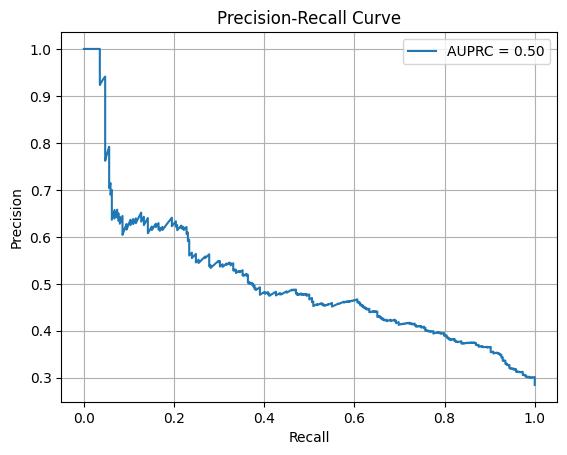


ROC Curve:


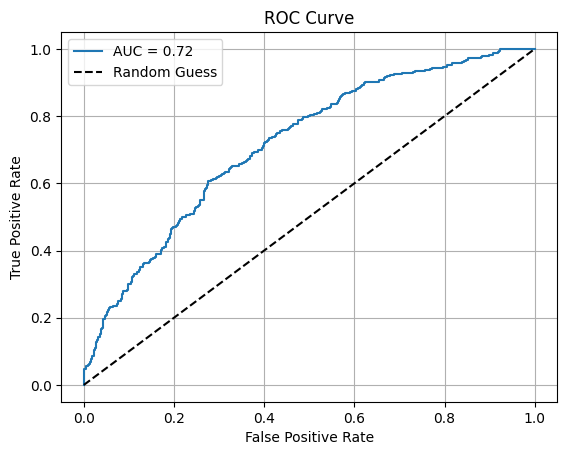


Mean F1 Score: 0.6182
Balanced Accuracy: 0.6550
Average AUPRC: 0.5016

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       849
           1       0.42      0.68      0.52       338

    accuracy                           0.64      1187
   macro avg       0.63      0.66      0.62      1187
weighted avg       0.72      0.64      0.66      1187


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7071, Accuracy: 0.5156
Validation Loss: 0.6925, Validation Accuracy: 0.5271
Epoch [2/100], Loss: 0.6913, Accuracy: 0.5572
Validation Loss: 0.6816, Validation Accuracy: 0.5633
Epoch [3/100], Loss: 0.6729, Accuracy: 0.6115
Validation Loss: 0.6786, Validation Accuracy: 0.6433
Epoch [4/100], Loss: 0.6533, Accuracy: 0.6737
Validation Loss: 0.6406, Validation Accuracy: 0.6281
Epoch [5/100], Loss: 0.6417, Accuracy: 0.7049
Validation Loss: 0.6497, Validation Accuracy: 0.6350
Epoch [6/100], Loss: 0.6353, Accuracy: 0.7119
Validation Loss: 0.7145, Validation Accuracy: 0.6330
Epoch [7/100], Loss: 0.6269, Accuracy: 0.7288
Validation Loss: 0.6740, Validation Accuracy: 0.6589
Epoch [8/100], Loss: 0.6199, Accuracy: 0.7420
Validation Loss: 0.6470, Validation Accuracy: 0.6218
Epoch [9/100], Loss: 0.6244, Accuracy: 0.7280
Validation Loss: 0.6500, Validation Accuracy: 0.5995
Epoch [10/100], Loss: 0.6158, Accuracy: 0.7461
Validation Loss: 0.6588, Validation Accuracy: 0.5534
Epoch [11

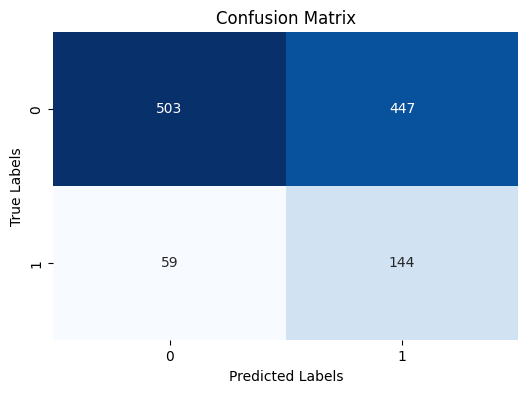


Class-wise Accuracy:
Class 0: 503/950 (52.95%)
Class 1: 144/203 (70.94%)

Precision-Recall Curve:


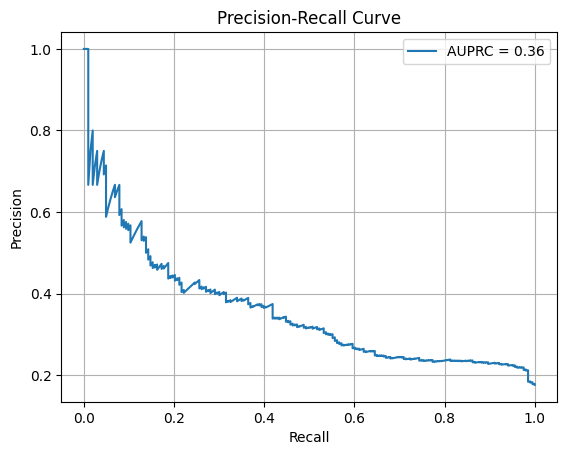


ROC Curve:


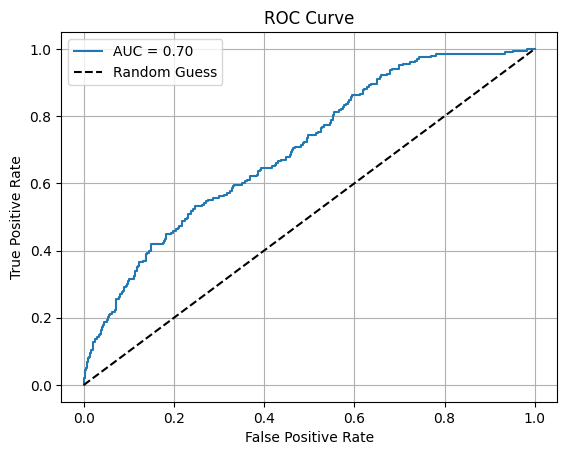


Mean F1 Score: 0.5140
Balanced Accuracy: 0.6194
Average AUPRC: 0.3559

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       950
           1       0.24      0.71      0.36       203

    accuracy                           0.56      1153
   macro avg       0.57      0.62      0.51      1153
weighted avg       0.78      0.56      0.61      1153


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 2:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.7483', '0.6927', '0.6536', '0.6550', '0.6194']
Average Balanced Accuracy across all folds: 0.6738
AUPRC for each fold: ['0.6724', '0.6671', '0.4615', '0.5016', '0.3559']
Average AUPRC across all folds: 0.5317
Best fold (Fold 1) class-wise accuracy:
  Class 0: Precision=0.8416, Recall=0.6996, F1=0.7640
  Class 1: Precision=0.6326, Recall=0.7970, F1=0.7053
  Macro Avg: Precision=0.73

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7029, Accuracy: 0.5088
Validation Loss: 0.6935, Validation Accuracy: 0.5319
Epoch [2/100], Loss: 0.6999, Accuracy: 0.5102
Validation Loss: 0.7257, Validation Accuracy: 0.5375
Epoch [3/100], Loss: 0.6902, Accuracy: 0.5394
Validation Loss: 0.7453, Validation Accuracy: 0.5470
Epoch [4/100], Loss: 0.6828, Accuracy: 0.5759
Validation Loss: 0.7620, Validation Accuracy: 0.5489
Epoch [5/100], Loss: 0.6777, Accuracy: 0.5981
Validation Loss: 0.6400, Validation Accuracy: 0.5356
Epoch [6/100], Loss: 0.6732, Accuracy: 0.6157
Validation Loss: 0.6764, Validation Accuracy: 0.5477
Epoch [7/100], Loss: 0.6723, Accuracy: 0.6162
Validation Loss: 0.6940, Validation Accuracy: 0.5393
Epoch [8/100], Loss: 0.6636, Accuracy: 0.6481
Validation Loss: 0.7304, Validation Accuracy: 0.5720
Epoch [9/100], Loss: 0.6618, Accuracy: 0.6435
Validation Loss: 0.7858, Validation Accuracy: 0.5913
Epoch [10/100], Loss: 0.6520, Accuracy: 0.6718
Validation Loss: 0.8230, Validation Accuracy: 0.5855
Epoch [11

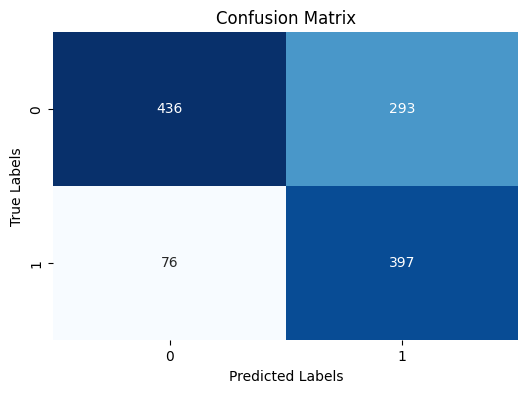


Class-wise Accuracy:
Class 0: 436/729 (59.81%)
Class 1: 397/473 (83.93%)

Precision-Recall Curve:


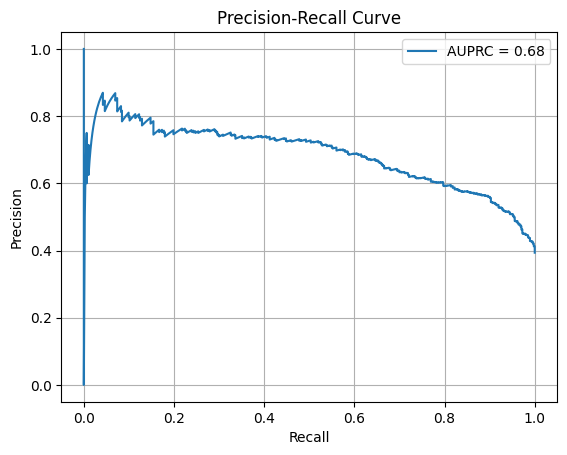


ROC Curve:


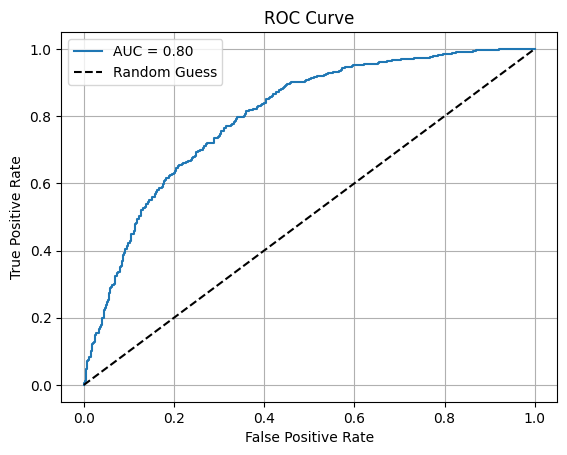


Mean F1 Score: 0.6927
Balanced Accuracy: 0.7187
Average AUPRC: 0.6840

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       729
           1       0.58      0.84      0.68       473

    accuracy                           0.69      1202
   macro avg       0.71      0.72      0.69      1202
weighted avg       0.74      0.69      0.69      1202


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7015, Accuracy: 0.5219
Validation Loss: 0.6873, Validation Accuracy: 0.6031
Epoch [2/100], Loss: 0.6932, Accuracy: 0.5334
Validation Loss: 0.6848, Validation Accuracy: 0.6401
Epoch [3/100], Loss: 0.6945, Accuracy: 0.5346
Validation Loss: 0.7087, Validation Accuracy: 0.5298
Epoch [4/100], Loss: 0.6938, Accuracy: 0.5334
Validation Loss: 0.7054, Validation Accuracy: 0.5446
Epoch [5/100], Loss: 0.6870, Accuracy: 0.5608
Validation Loss: 0.6667, Validation Accuracy: 0.6942
Epoch [6/100], Loss: 0.6890, Accuracy: 0.5589
Validation Loss: 0.6848, Validation Accuracy: 0.6052
Epoch [7/100], Loss: 0.6829, Accuracy: 0.5723
Validation Loss: 0.6556, Validation Accuracy: 0.6918
Epoch [8/100], Loss: 0.6761, Accuracy: 0.5990
Validation Loss: 0.6911, Validation Accuracy: 0.5923
Epoch [9/100], Loss: 0.6778, Accuracy: 0.5996
Validation Loss: 0.6817, Validation Accuracy: 0.6187
Epoch [10/100], Loss: 0.6771, Accuracy: 0.6002
Validation Loss: 0.6387, Validation Accuracy: 0.6716
Epoch [11

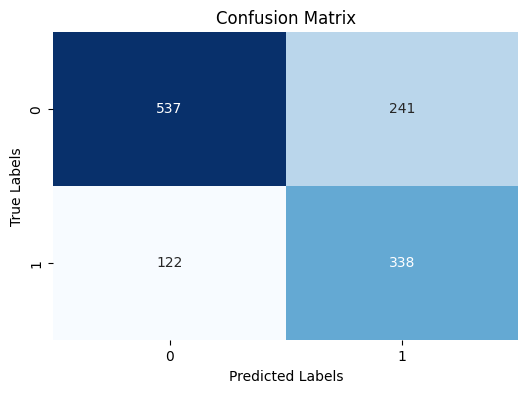


Class-wise Accuracy:
Class 0: 537/778 (69.02%)
Class 1: 338/460 (73.48%)

Precision-Recall Curve:


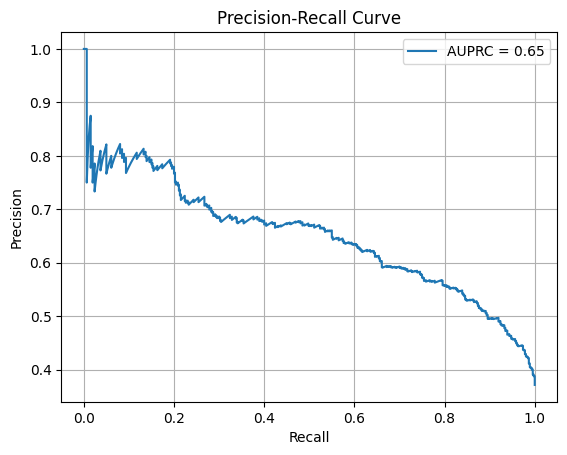


ROC Curve:


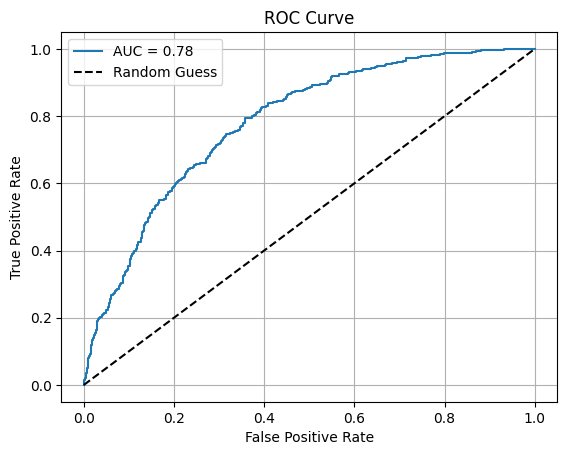


Mean F1 Score: 0.6990
Balanced Accuracy: 0.7125
Average AUPRC: 0.6494

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       778
           1       0.58      0.73      0.65       460

    accuracy                           0.71      1238
   macro avg       0.70      0.71      0.70      1238
weighted avg       0.73      0.71      0.71      1238


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6991, Accuracy: 0.5113
Validation Loss: 0.6848, Validation Accuracy: 0.5037
Epoch [2/100], Loss: 0.6889, Accuracy: 0.5414
Validation Loss: 0.6713, Validation Accuracy: 0.5456
Epoch [3/100], Loss: 0.6754, Accuracy: 0.6031
Validation Loss: 0.6758, Validation Accuracy: 0.6051
Epoch [4/100], Loss: 0.6700, Accuracy: 0.6134
Validation Loss: 0.6648, Validation Accuracy: 0.6100
Epoch [5/100], Loss: 0.6629, Accuracy: 0.6410
Validation Loss: 0.6730, Validation Accuracy: 0.6543
Epoch [6/100], Loss: 0.6620, Accuracy: 0.6484
Validation Loss: 0.6592, Validation Accuracy: 0.6478
Epoch [7/100], Loss: 0.6657, Accuracy: 0.6435
Validation Loss: 0.6758, Validation Accuracy: 0.6495
Epoch [8/100], Loss: 0.6616, Accuracy: 0.6440
Validation Loss: 0.6677, Validation Accuracy: 0.6645
Epoch [9/100], Loss: 0.6618, Accuracy: 0.6499
Validation Loss: 0.6436, Validation Accuracy: 0.6274
Epoch [10/100], Loss: 0.6545, Accuracy: 0.6637
Validation Loss: 0.6749, Validation Accuracy: 0.6726
Epoch [11

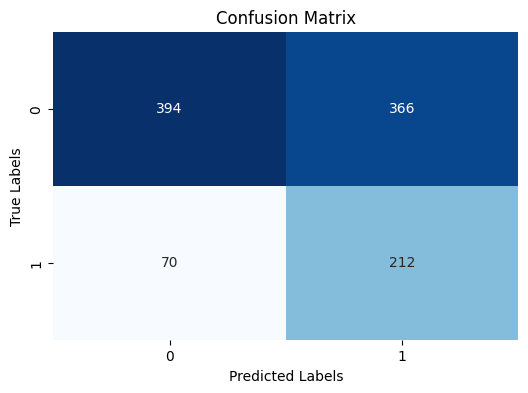


Class-wise Accuracy:
Class 0: 394/760 (51.84%)
Class 1: 212/282 (75.18%)

Precision-Recall Curve:


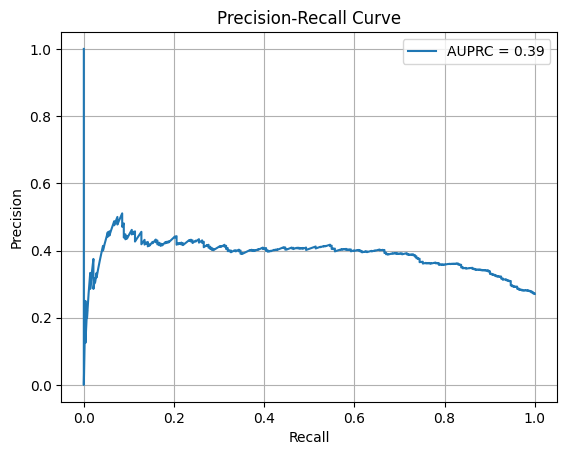


ROC Curve:


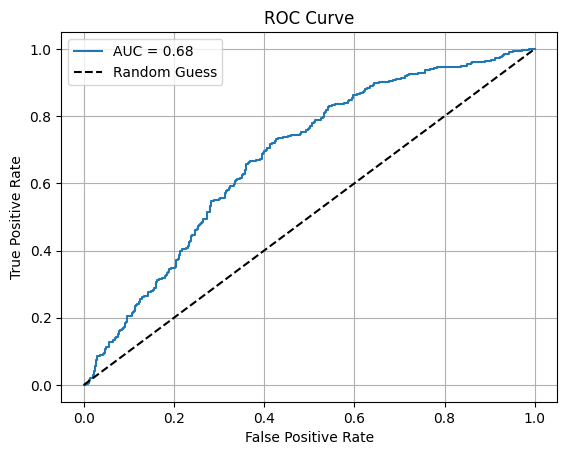


Mean F1 Score: 0.5684
Balanced Accuracy: 0.6351
Average AUPRC: 0.3876

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.52      0.64       760
           1       0.37      0.75      0.49       282

    accuracy                           0.58      1042
   macro avg       0.61      0.64      0.57      1042
weighted avg       0.72      0.58      0.60      1042


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6967, Accuracy: 0.5299
Validation Loss: 0.7019, Validation Accuracy: 0.5672
Epoch [2/100], Loss: 0.6833, Accuracy: 0.5766
Validation Loss: 0.6827, Validation Accuracy: 0.5504
Epoch [3/100], Loss: 0.6666, Accuracy: 0.6294
Validation Loss: 0.6673, Validation Accuracy: 0.5220
Epoch [4/100], Loss: 0.6516, Accuracy: 0.6769
Validation Loss: 0.6894, Validation Accuracy: 0.6041
Epoch [5/100], Loss: 0.6494, Accuracy: 0.6783
Validation Loss: 0.6840, Validation Accuracy: 0.6118
Epoch [6/100], Loss: 0.6473, Accuracy: 0.6774
Validation Loss: 0.7047, Validation Accuracy: 0.6388
Epoch [7/100], Loss: 0.6443, Accuracy: 0.6857
Validation Loss: 0.6495, Validation Accuracy: 0.5673
Epoch [8/100], Loss: 0.6361, Accuracy: 0.6976
Validation Loss: 0.6726, Validation Accuracy: 0.6135
Epoch [9/100], Loss: 0.6418, Accuracy: 0.6813
Validation Loss: 0.7147, Validation Accuracy: 0.6431
Epoch [10/100], Loss: 0.6422, Accuracy: 0.6888
Validation Loss: 0.6862, Validation Accuracy: 0.6534
Epoch [11

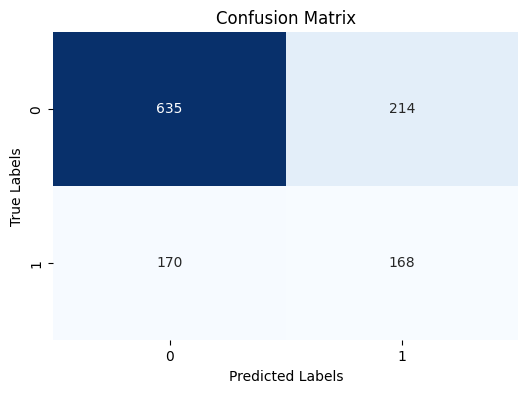


Class-wise Accuracy:
Class 0: 635/849 (74.79%)
Class 1: 168/338 (49.70%)

Precision-Recall Curve:


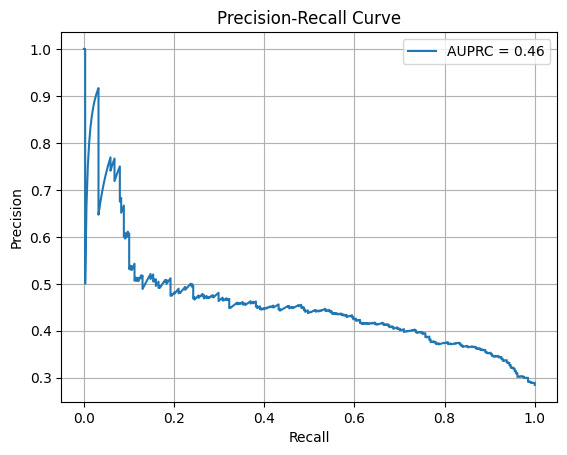


ROC Curve:


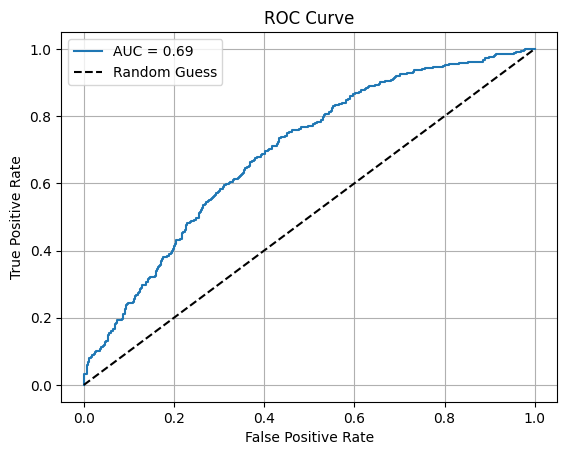


Mean F1 Score: 0.6173
Balanced Accuracy: 0.6225
Average AUPRC: 0.4567

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       849
           1       0.44      0.50      0.47       338

    accuracy                           0.68      1187
   macro avg       0.61      0.62      0.62      1187
weighted avg       0.69      0.68      0.68      1187


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_50372\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7071, Accuracy: 0.5189
Validation Loss: 0.7110, Validation Accuracy: 0.5267
Epoch [2/100], Loss: 0.6913, Accuracy: 0.5428
Validation Loss: 0.7188, Validation Accuracy: 0.5085
Epoch [3/100], Loss: 0.6847, Accuracy: 0.5626
Validation Loss: 0.6569, Validation Accuracy: 0.5328
Epoch [4/100], Loss: 0.6691, Accuracy: 0.6309
Validation Loss: 0.6676, Validation Accuracy: 0.6223
Epoch [5/100], Loss: 0.6605, Accuracy: 0.6646
Validation Loss: 0.6548, Validation Accuracy: 0.6074
Epoch [6/100], Loss: 0.6489, Accuracy: 0.6794
Validation Loss: 0.6532, Validation Accuracy: 0.6020
Epoch [7/100], Loss: 0.6370, Accuracy: 0.7033
Validation Loss: 0.6505, Validation Accuracy: 0.6002
Epoch [8/100], Loss: 0.6332, Accuracy: 0.7115
Validation Loss: 0.6837, Validation Accuracy: 0.6414
Epoch [9/100], Loss: 0.6346, Accuracy: 0.7029
Validation Loss: 0.6686, Validation Accuracy: 0.6294
Epoch [10/100], Loss: 0.6334, Accuracy: 0.7066
Validation Loss: 0.6622, Validation Accuracy: 0.6201
Epoch [11

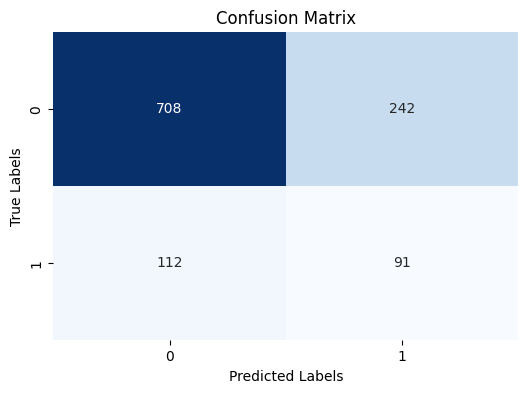


Class-wise Accuracy:
Class 0: 708/950 (74.53%)
Class 1: 91/203 (44.83%)

Precision-Recall Curve:


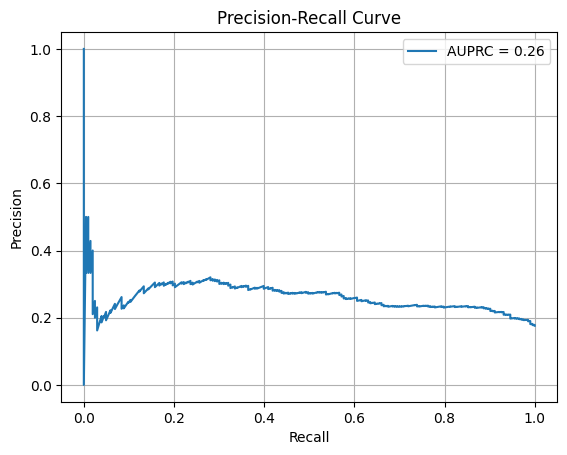


ROC Curve:


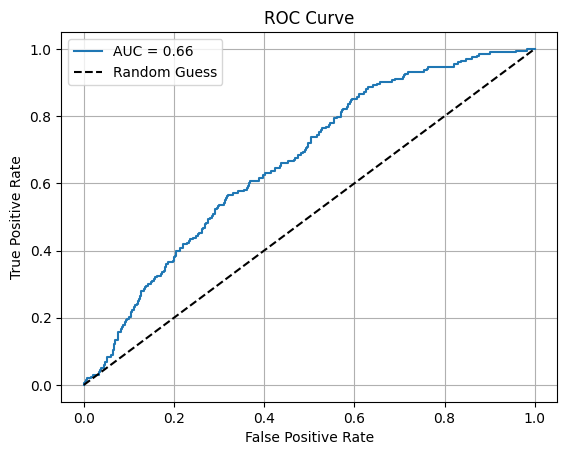


Mean F1 Score: 0.5698
Balanced Accuracy: 0.5968
Average AUPRC: 0.2592

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       950
           1       0.27      0.45      0.34       203

    accuracy                           0.69      1153
   macro avg       0.57      0.60      0.57      1153
weighted avg       0.76      0.69      0.72      1153


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 3:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.7187', '0.7125', '0.6351', '0.6225', '0.5968']
Average Balanced Accuracy across all folds: 0.6571
AUPRC for each fold: ['0.6840', '0.6494', '0.3876', '0.4567', '0.2592']
Average AUPRC across all folds: 0.4874
Best fold (Fold 1) class-wise accuracy:
  Class 0: Precision=0.8516, Recall=0.5981, F1=0.7027
  Class 1: Precision=0.5754, Recall=0.8393, F1=0.6827
  Macro Avg: Precision=0.71

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc
import pandas as pd
import os
import datetime

# Define hyperparameter sets
hyperparameter_sets = [
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 4.791527211534685e-05, 'weight_decay': 2.723389186594195e-05, 'batch_size': 32, 'num_transformer_blocks': 6, 'num_heads': 8, 'accuracy': 0.4340},
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 5.5832423292191354e-05, 'weight_decay': 7.139534466914747e-05, 'batch_size': 32, 'num_transformer_blocks': 8, 'num_heads': 8, 'accuracy': 0.4309},
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 2.0947119755454103e-05, 'weight_decay': 1.0971600691032106e-05, 'batch_size': 32, 'num_transformer_blocks': 4, 'num_heads': 8, 'accuracy': 0.4271},
]

# Global configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)
num_classes = 2
epochs = 100
input_shape = (3, 224, 224)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Store results for all hyperparameter sets
all_results = []

# Loop through each hyperparameter set
for param_idx, params in enumerate(hyperparameter_sets):
    print(f"\n{'='*80}")
    print(f"HYPERPARAMETER SET {param_idx + 1}")
    print(f"Parameters: {params}")
    print(f"{'='*80}")
    
    # Extract parameters
    n_patches = params['n_patches']
    hidden_size = params['embed_dim']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']
    num_transformer_blocks = params['num_transformer_blocks']
    num_heads = params['num_heads']
    
    # Initialize storage for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []
    fold_accuracies = []
    fold_auprcs = []
    fold_class_reports = []
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'\nFold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = vit(input_size=input_shape, n_patches=n_patches, hidden_size=hidden_size, 
                        num_classes=num_classes, num_transformer_blocks=num_transformer_blocks, 
                        num_heads=num_heads)
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Get classification report for class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        fold_class_reports.append(class_report)

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        fold_auprcs.append(auprc)

        print(f'Test Fold {fold_idx + 1}, AUPRC: {auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_report = fold_class_reports[best_fold_idx]
    
    # Display results for this parameter set
    print(f'\n{"-"*60}')
    print(f'RESULTS FOR HYPERPARAMETER SET {param_idx + 1}:')
    print(f'{"-"*60}')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy:')
    for class_name, metrics in best_fold_class_report.items():
        if class_name.isdigit():
            print(f'  Class {class_name}: Precision={metrics["precision"]:.4f}, Recall={metrics["recall"]:.4f}, F1={metrics["f1-score"]:.4f}')
    print(f'  Macro Avg: Precision={best_fold_class_report["macro avg"]["precision"]:.4f}, Recall={best_fold_class_report["macro avg"]["recall"]:.4f}, F1={best_fold_class_report["macro avg"]["f1-score"]:.4f}')
    
    # Store results
    all_results.append({
        'param_set': param_idx + 1,
        'params': params,
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'average_auprc': average_auprc,
        'best_fold_idx': best_fold_idx,
        'best_fold_class_report': best_fold_class_report
    })

# Display summary of all results
print(f'\n{"="*80}')
print("SUMMARY OF ALL HYPERPARAMETER SETS")
print(f'{"="*80}')

for result in all_results:
    print(f'\nHyperparameter Set {result["param_set"]}:')
    print(f'  Parameters: n_patches={result["params"]["n_patches"]}, embed_dim={result["params"]["embed_dim"]}, lr={result["params"]["learning_rate"]:.2e}')
    print(f'  Average Balanced Accuracy: {result["mean_accuracy"]:.4f}')
    print(f'  Average AUPRC: {result["average_auprc"]:.4f}')
    print(f'  Fold Accuracies: {[f"{acc:.4f}" for acc in result["fold_accuracies"]]}')
    print(f'  Fold AUPRCs: {[f"{auprc:.4f}" for auprc in result["fold_auprcs"]]}')
    print(f'  Best Fold: {result["best_fold_idx"] + 1} (Accuracy: {result["fold_accuracies"][result["best_fold_idx"]]:.4f})')

# Find overall best performing hyperparameter set
best_overall_idx = np.argmax([result["mean_accuracy"] for result in all_results])
print(f'\nBest Overall Hyperparameter Set: {best_overall_idx + 1}')
print(f'Best Average Balanced Accuracy: {all_results[best_overall_idx]["mean_accuracy"]:.4f}')